# **Project 3 Report**

Ritik Bhardwaj

CS458

## **P3-1. Load Newsgroup / Build Classifiers**

** Load the following 4 categories from the 20 newsgroups dataset: categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']. Build classifiers using the following methods:
1) Support Vector Machine (sklearn.svm.LinearSVC)
2) Naive Bayes classifiers (sklearn.naive_bayes.MultinomialNB)
3) K-nearest neighbors (sklearn.neighbors.KNeighborsClassifier)
4) Random forest (sklearn.ensemble.RandomForestClassifier)
5) AdaBoost classifier (sklearn.ensemble.AdaBoostClassifier) **

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

categories = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']
train_data = fetch_20newsgroups(subset='train', categories=categories)
test_data = fetch_20newsgroups(subset='train', categories=categories)



def SUPPORTVECTOR(train_data, test_data):
  clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', LinearSVC(random_state=0))])
  clf = clf.fit(train_data.data, train_data.target)
  predicted = clf.predict(test_data.data)
  print("SUPPORTVECTOR")
  print("Accuracy is = {}%".format(np.mean(predicted == test_data.target)*100))

def Naivebayes(train_data, test_data):
  clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
  clf = clf.fit(train_data.data, train_data.target)
  predicted = clf.predict(test_data.data)
  print("Naivebayes")
  print("Accuracy is = {}%".format(np.mean(predicted == test_data.target)*100))

def Kneighbors(train_data, test_data):
  clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', KNeighborsClassifier())])
  clf = clf.fit(train_data.data, train_data.target)
  predicted = clf.predict(test_data.data)
  print("Kneighbors")
  print("Accuracy is = {}%".format(np.mean(predicted == test_data.target)*100))

def RandomForest(train_data, test_data):
  clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', RandomForestClassifier(max_depth=18, random_state=0))])
  clf = clf.fit(train_data.data, train_data.target)
  predicted = clf.predict(test_data.data)
  print("RandomForest")
  print("Accuracy is = {}%".format(np.mean(predicted == test_data.target)*100))

def AdaBoost(train_data, test_data):
  clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', AdaBoostClassifier(n_estimators=500, random_state=0))])
  clf = clf.fit(train_data.data, train_data.target)
  predicted = clf.predict(test_data.data)
  print("AdaBoost")
  print("Accuracy is = {}%".format(np.mean(predicted == test_data.target)*100))


SUPPORTVECTOR(train_data, test_data)
Naivebayes(train_data, test_data)
Kneighbors(train_data, test_data)
RandomForest(train_data, test_data)
AdaBoost(train_data, test_data)

SUPPORTVECTOR
Accuracy is = 100.0%
Naivebayes
Accuracy is = 98.69646182495345%
Kneighbors
Accuracy is = 96.7877094972067%
RandomForest
Accuracy is = 95.90316573556798%
AdaBoost
Accuracy is = 92.92364990689012%


# **P3-2. Recognizing hand-written digits**

**(a) Develop a multi-layer perceptron classifier to recognize images of hand-written digits. To build your classifier, you can use: sklearn.neural_network.MLPClassifier   
Instructions: use sklearn.model_selection.train_test_split to split your dataset into random train and test subsets, where you set test_size=0.5. Optimize the hyperparameters of your neural network to maximize the classification 
accuracy. Show the confusion matrix of your neural network. **

In [ ]:
import itertools
import numpy as np
import random as r
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()
n_samples = len(digits.images)
digits.images = data = digits.images.reshape((n_samples, -1))
X_train, X_test, y_train, y_test = train_test_split(digits.images, digits.target, test_size=0.3)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)
scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)
TEST_ITER = 5
best_model = {'hls': 0, 'act': '','lr': '','accuracy': 0,'classifier': None}

for i in range(TEST_ITER):
    hls = r.randint(100, 1000)
    act = r.choice(['identity', 'logistic', 'tanh', 'relu'])
    lr = r.choice(['constant', 'invscaling', 'adaptive'])
    classifier = MLPClassifier(hidden_layer_sizes=hls, 
                              activation=act, 
                              learning_rate=lr)
    #training the neural network
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_validation)
    
    accuracy = accuracy_score(y_validation, y_pred)
    if accuracy > best_model['accuracy']:
        best_model['hls'] = hls 
        best_model['act'] = act
        best_model['lr'] = lr
        best_model['accuracy'] = accuracy
        best_model['classifier'] = classifier

print('\naccuracy: ' + str(best_model['accuracy']))




accuracy: 0.9841269841269841


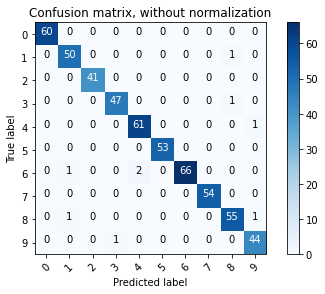

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        pass
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
classifier = best_model['classifier']
y_pred = classifier.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
class_names = digits.target_names
np.set_printoptions(precision=2)
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.show()

# **P3-3. Nonlinear Support Vector Machine**

**(a) Randomly generate the following 2-class data points                                                              
    import numpy as np                                                                                                       
    np.random.seed(0)                                                                                                       
    X = np.random.rand(300, 2)*10-5                                                                                         
    Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)**

In [ ]:
# Codes for P3-3(a)
import numpy as np
np.random.seed(0)
X = np.random.rand(300, 2)*10-5
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

print(X)
print(Y)

[[ 0.49  2.15]
 [ 1.03  0.45]
 [-0.76  1.46]
 [-0.62  3.92]
 [ 4.64 -1.17]
 [ 2.92  0.29]
 [ 0.68  4.26]
 [-4.29 -4.13]
 [-4.8   3.33]
 [ 2.78  3.7 ]
 [ 4.79  2.99]
 [-0.39  2.81]
 [-3.82  1.4 ]
 [-3.57  4.45]
 [ 0.22 -0.85]
 [-2.35  2.74]
 [-0.44  0.68]
 [-4.81  1.18]
 [ 1.12  1.17]
 [ 4.44  1.82]
 [-1.4  -0.63]
 [ 1.98 -4.4 ]
 [ 1.67  1.71]
 [-2.9  -3.71]
 [-1.85 -1.36]
 [ 0.7  -0.61]
 [ 4.88 -3.98]
 [-2.91 -3.39]
 [ 1.53 -2.47]
 [-0.34 -2.56]
 [-3.41 -3.9 ]
 [ 1.56 -3.62]
 [-3.03 -1.31]
 [ 3.21 -4.03]
 [ 3.38 -4.04]
 [ 4.76 -0.31]
 [ 4.77  1.05]
 [ 2.39 -4.61]
 [-2.17 -3.8 ]
 [-2.04 -3.81]
 [-1.82 -0.86]
 [-4.36  1.92]
 [ 0.67 -2.35]
 [ 0.23 -4.06]
 [ 0.76  4.29]
 [-1.81  1.67]
 [-3.68  2.16]
 [-2.11 -3.17]
 [ 0.87 -4.8 ]
 [ 3.29 -4.95]
 [ 1.78 -2.3 ]
 [ 2.35  4.62]
 [-2.51  0.76]
 [ 0.92  0.72]
 [-2.77  4.53]
 [-0.53  3.46]
 [ 1.99 -2.03]
 [ 3.14 -1.03]
 [ 3.81  0.81]
 [ 3.82  1.93]
 [ 2.25  0.01]
 [ 4.56  1.44]
 [-0.76  1.06]
 [-4.81 -1.98]
 [ 1.6  -2.1 ]
 [ 1.18 -0.71]
 [-3.65 -2

**(b) Develop a nonlinear SVM binary classifier (sklearn.svm.NuSVC).**

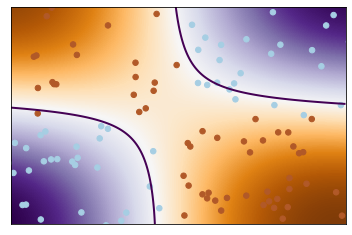

In [ ]:
# Codes for P3-3(b)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
warnings.simplefilter(action='ignore')
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.rand(300, 2)*10-5
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC()
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linetypes='--')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired)
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

**(c) Plot these data points and the corresponding decision boundaries, which is similar to the figure in the slide 131 in Chapter 4.**

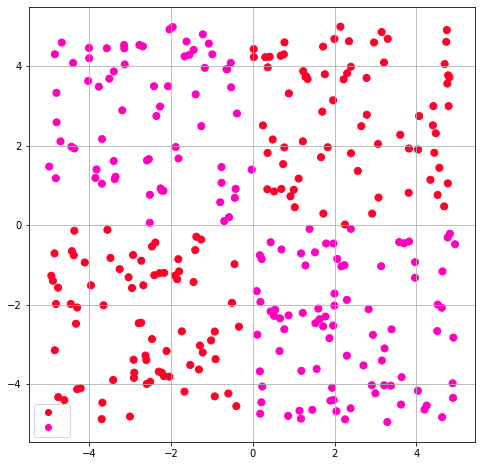

In [ ]:
# Codes for P3-3(c)
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
X = np.random.rand(300, 2)*10-5
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
plt.figure(figsize=(8,8));
scatter = plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='gist_rainbow', s=50);


plt.legend(handles=scatter.legend_elements()[0]);
plt.grid();